## Analysis on SARS data (2003)

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Web scraping SARS data

In [97]:
url = "https://www.who.int/csr/sars/country/en/"
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml')
all_a_tags = results_page.find('ul',class_='auto_archive').find_all('a')

In [98]:
urls = ['https://www.who.int/'+tag.get('href') for tag in all_a_tags]

In [120]:
def get_data(urls):
    data = []
    for url in urls:
        response = requests.get(url)
        results_page = BeautifulSoup(response.content,'lxml')
        table = results_page.find('table')
        date = url.split("/")[-3]
        if table:
            data.append(get_table(table,date))
        else:
            print(url,date)
            data.append(pd.DataFrame([date]))
    return data

In [121]:
def get_table(table,date):
    data = []
    for r in table.find_all('tr'):
        data_row = [date]
        for d in r.find_all('td'):
            data_row.append(d.text.strip())
        data.append(data_row)
    return pd.DataFrame(data)

In [122]:
data = get_data(urls)

https://www.who.int//csr/sars/country/2003_08_15/en/ 2003_08_15


In [140]:
len([len(i.columns) for i in data if len(i.columns)==5])

21

In [243]:
df = pd.concat(data[2:22])
new_header = list(df.iloc[0])[3:]
new_header = ['Date','Country','Cumulative number of cases']+new_header
df = df[20:]
df.columns = new_header
df = df.iloc[:, :-3]

In [244]:
df

,Date,Country,Cumulative number of cases,Number of deaths,Local transmission,NaN,NaN
6,2003_03_20,Slovenia,1,0,None*,NaN,NaN
7,2003_03_20,Spain,1,0,To be determined,NaN,NaN
8,2003_03_20,Switzerland,7,0,To be determined,NaN,NaN
9,2003_03_20,"Taiwan, China",4,0,Yes,NaN,NaN
10,2003_03_20,Thailand,1,0,None*,NaN,NaN
...,...,...,...,...,...,...,...
17,2003_04_10,Thailand,7,0,2,5,None
18,2003_04_10,United Kingdom,5,0,0,3,None
19,2003_04_10,United States,154,5,0,not \n available,None
20,2003_04_10,Viet Nam,62,0,4,43,Yes


In [172]:
import seaborn as sns

In [245]:
df['Number of deaths'].unique()

array(['0', '2', '10', 'Number of deaths', '', '6**', '7**', '11', '3',
       '10**', '4', '17', '31', '1', '49', '34', '53', '10*', '54', '13*',
       '58', '16*', '62', '6', '46', '78', '17*', '79', '7', '5', '84',
       '20*', '89', '9', '23*', '98', '25*', '8', '103', '27*', '106',
       'Number of new cases since last \n  WHO update', None, '28', '59'],
      dtype=object)

In [246]:
import re

In [290]:
df = df[(df['Country']!='Country') & (df['Country']!='Total') & (df['Country']!='Number of deaths')]

In [271]:
df['Number of deaths'] = df['Number of deaths'].apply(lambda x: re.search('\d*',x).group() if x and re.search('\d*',x) else None)
df['Cumulative number of cases'] = df['Cumulative number of cases'].apply(lambda x: re.search('\d*',x).group() if x and re.search('\d*',x) else None)
df['Country'] = df['Country'].apply(lambda x: re.search('[A-Za-z ]*',x).group().strip() if x and re.search('[A-Za-z ]*',x) else None)

In [291]:
df['Country'].unique()

array(['Slovenia', 'Spain', 'Switzerland', 'Taiwan', 'Thailand',
       'United Kingdom', 'United States', 'Viet Nam', 'Canada', 'China',
       'Germany', 'Hong Kong Special Administrative Region of China',
       'Italy', 'Republic of Ireland', 'Singapore', 'France', 'Romania',
       'Australia', 'Belgium', 'Brazil', 'Malaysia', 'Kuwait'],
      dtype=object)

In [250]:
df['Date'].unique()

array(['2003_03_20', '2003_03_21', '2003_03_22', '2003_03_24',
       '2003_03_25', '2003_03_26', '2003_03_27', '2003_03_28',
       '2003_03_29', '2003_03_31', '2003_04_01', '2003_04_02',
       '2003_04_03', '2003_04_04', '2003_04_05', '2003_04_07',
       '2003_04_08', '2003_04_09', '2003_04_10'], dtype=object)

In [281]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y_%m_%d")
df = df.fillna(0)
df['Number of deaths'] = df['Number of deaths'].astype(int)
df['Cumulative number of cases'] = df['Cumulative number of cases'].astype(int)

#### SARS Cases around the world

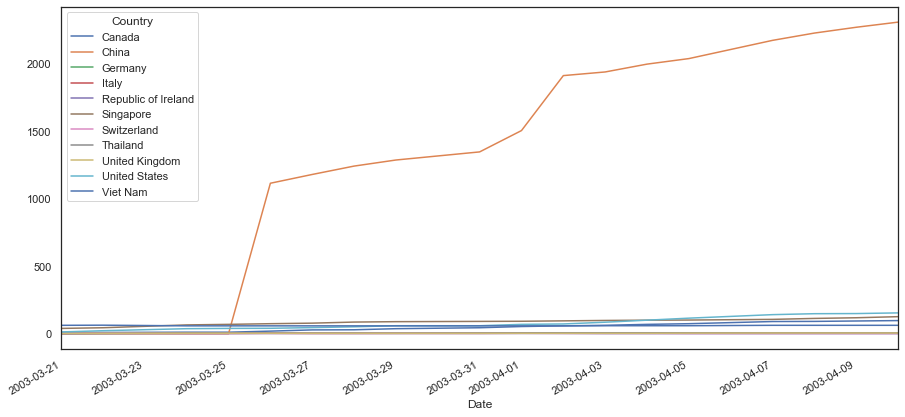

In [330]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Country']).sum()['Cumulative number of cases'].unstack()[1:].dropna(axis=1).plot(ax=ax)

#### SARS cases excluding China

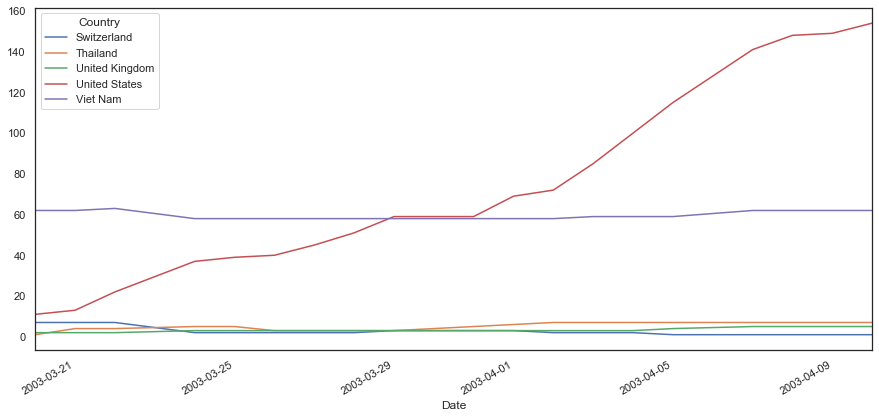

In [331]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Country']).sum()['Cumulative number of cases'].unstack().dropna(axis=1).plot(ax=ax)

#### SARS cases in the US

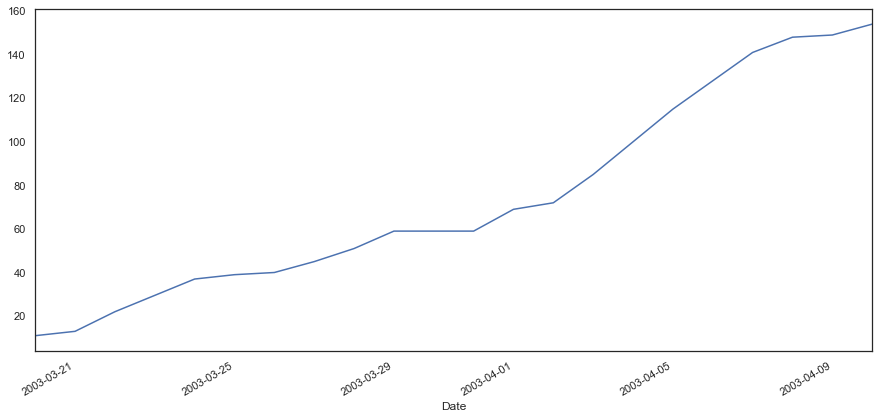

In [333]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Country']).sum()['Cumulative number of cases'].unstack()['United States'].plot(ax=ax)

## Analysis on Covid Data (2020)

In [19]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot

In [16]:
df = pd.read_csv("covid-testing-all-observations.csv")

In [32]:
df['Entity'] = df['Entity'].apply(lambda x: x.split('-')[0].strip())

In [33]:
country_list = ['Slovenia', 'Spain', 'Switzerland', 'Taiwan', 'Thailand',
       'United Kingdom', 'United States', 'Viet Nam', 'Canada', 'China',
       'Germany', 'Hong Kong',
       'Italy', 'Ireland', 'Singapore', 'France', 'Romania',
       'Australia', 'Belgium', 'Brazil', 'Malaysia', 'Kuwait']

In [34]:
df['filter'] = df['Entity'].apply(lambda x: True if x in country_list else False)

In [42]:
df.head()

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,7-day rolling mean daily change,7-day rolling mean daily change per thousand,filter
22,Australia,2020-03-22,https://doi.org/10.33321/cdi.2020.44.28,Australian Government Department of Health,NaN,143056,NaN,5.610,NaN,NaN,NaN,NaN,NaN,True
23,Australia,2020-03-29,https://doi.org/10.33321/cdi.2020.44.29,Australian Government Department of Health,NaN,211261,NaN,8.285,NaN,NaN,NaN,NaN,NaN,True
24,Australia,2020-04-05,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,297154,NaN,11.653,NaN,NaN,NaN,NaN,NaN,True
25,Australia,2020-04-06,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,302663,5509.0,11.869,0.216,NaN,NaN,NaN,NaN,True
26,Australia,2020-04-07,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,310700,8037.0,12.184,0.315,NaN,NaN,NaN,NaN,True


In [40]:
df = df[(df['filter']) & (df['Date']>'2020-02-28')]

#### Covid cases around the world

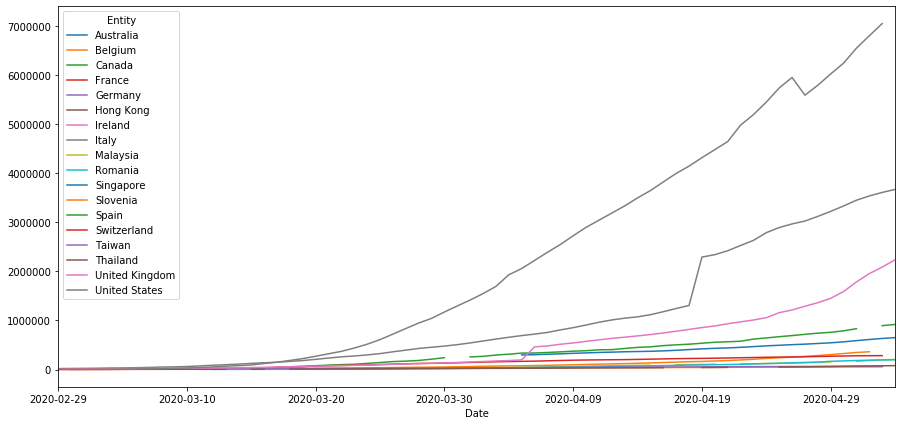

In [41]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Entity']).sum()['Cumulative total'].unstack().plot(ax=ax)

#### Covid Cases in the US

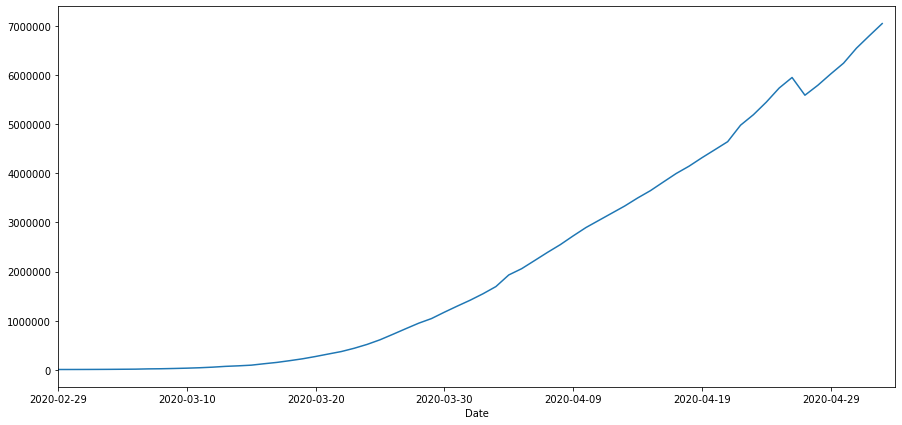

In [43]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Entity']).sum()['Cumulative total'].unstack()['United States'].plot(ax=ax)